In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.8 MB/s eta 0:00:00


In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.8 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/dataset 1.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


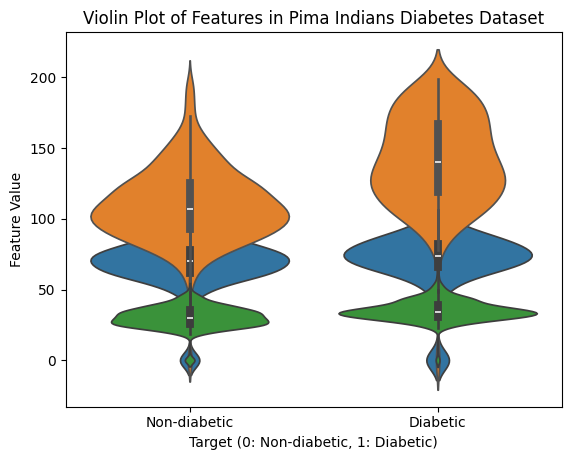

In [ ]:
features = ['BloodPressure', 'Glucose', 'BMI']

sns.violinplot(
    x="Outcome",
    y=features[0],
    # showmeans=True,
    data=df
)

# Repeat for other features:
for feature in features[1:]: # Iterate through the feature names directly
    sns.violinplot(
        x="Outcome",
        y=feature, # Use the current feature name instead of its first character
        # showmeans=True,
        data=df,
        ax=plt.gca() # Add subsequent violin plots to the same axes
    )

# Customize the plot (optional):
plt.xlabel('Target (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('Feature Value')
plt.title('Violin Plot of Features in Pima Indians Diabetes Dataset')
plt.xticks([0, 1], ['Non-diabetic', 'Diabetic'])  # Set custom labels for x-axis ticks
plt.subplots_adjust(bottom=0.1) # Adjust spacing to avoid overlapping labels

# Display the plot
plt.show()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [ ]:
df["Outcome"].unique()

array([1, 0])

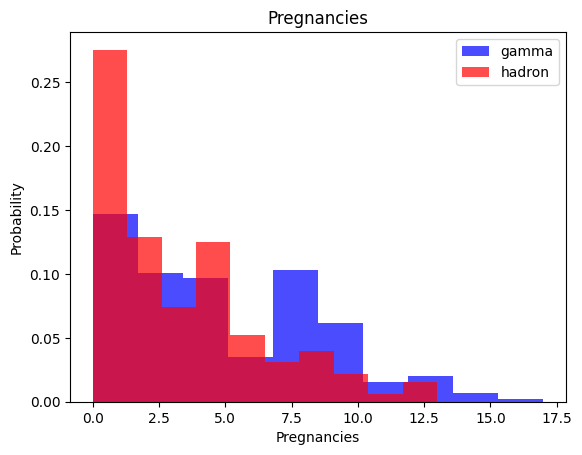

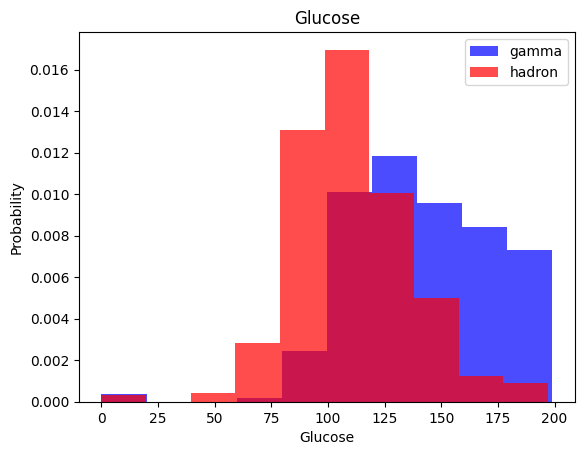

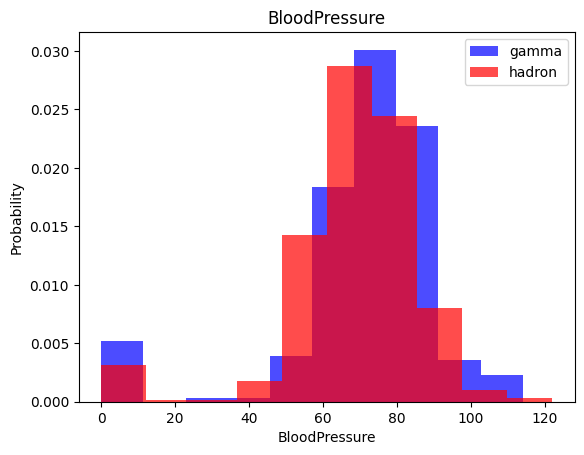

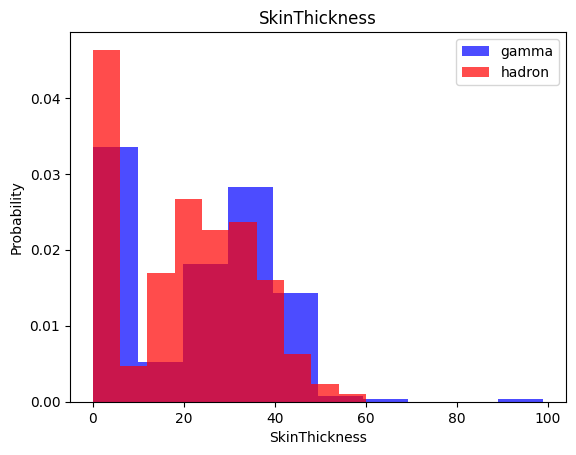

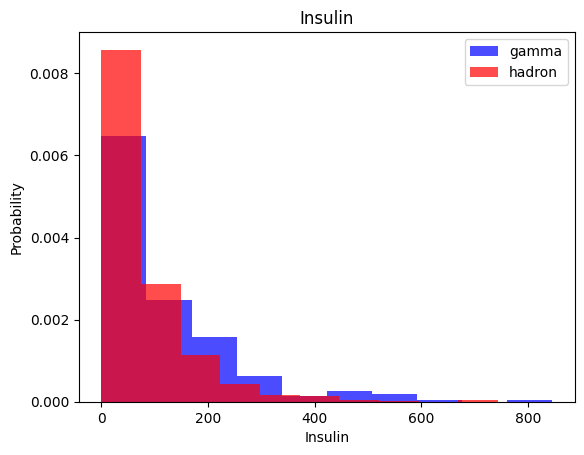

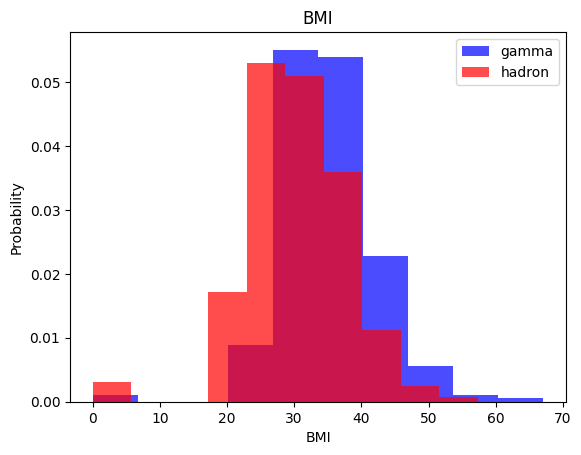

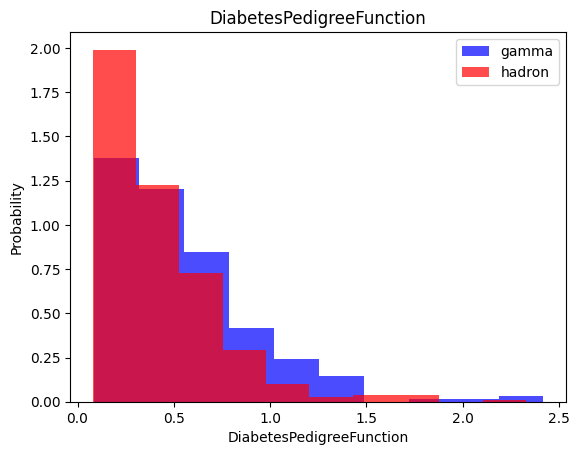

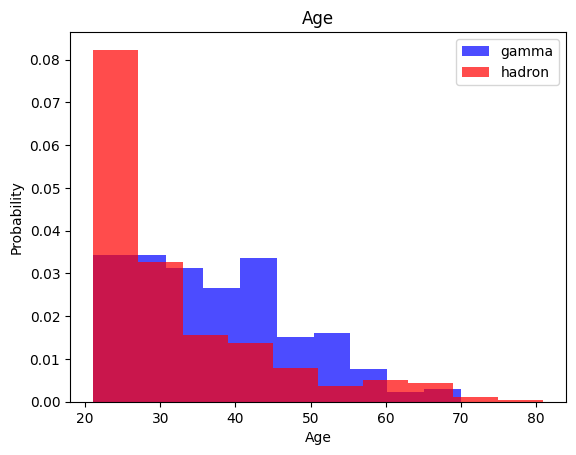

In [ ]:
# relation between features and target class Outcome
for label in cols[:-1]:
  plt.hist(df[df["Outcome"]==1][label], color='blue',label='gamma',alpha=0.7,density='true')
  plt.hist(df[df["Outcome"]==0][label], color='red',label='hadron',alpha=0.7,density='true')
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train,valid and test

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# scale dataset if it is too variate
def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  # fit and transform x
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  #whole data as huge 2D numpy array
  data = np.hstack((X,np.reshape(y, (-1,1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
# since for have not seen valid and test = false
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)


In [ ]:
len(y_train)

602

In [ ]:
len(X_train)

602

#knn


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict = knn_model.predict(X_test)

In [ ]:
print("KNN CLassification_Report on Dataset1")
print(classification_report(y_test, y_predict))

KNN CLassification_Report on Dataset1
              precision    recall  f1-score   support

           0       0.78      0.68      0.73        98
           1       0.54      0.66      0.60        56

    accuracy                           0.68       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.69      0.68      0.68       154



In [ ]:
from sklearn import metrics
Accuracy_knn1 = metrics.accuracy_score(y_test,y_predict)
print("Accuracy of KNN Model1: ",Accuracy_knn1*100)

Accuracy of KNN Model1:  67.53246753246754


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
result1 = metrics.confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(result1)

Confusion Matrix:
[[67 31]
 [19 37]]


<Axes: >

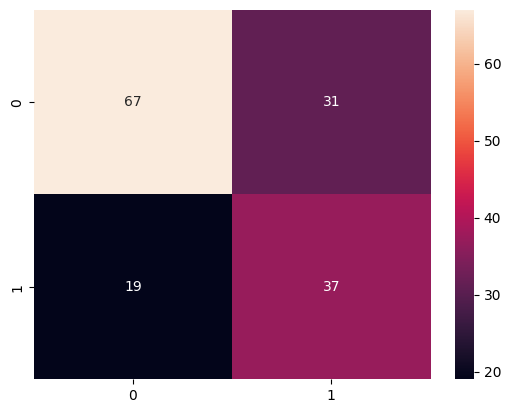

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='d')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm=confusion_matrix(y_test,y_predict)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Classification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 67
FP - False Positive 31
FN - False Negative 19
TP - True Positive 37
Accuracy Rate: 67.53246753246754
Classification Rate: 32.467532467532465


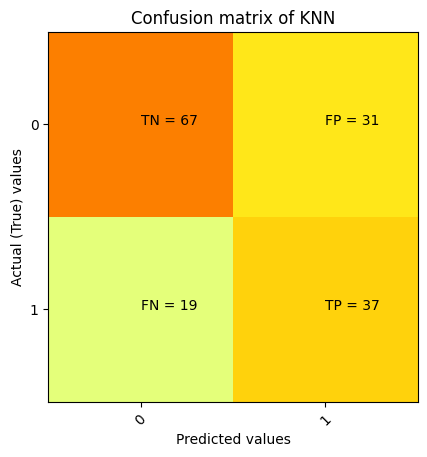

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation = 'nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title("Confusion matrix of KNN")
plt.ylabel("Actual (True) values")
plt.xlabel("Predicted values")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
  for j in range(2):
    plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test,y_predict)*100,2)
print('roc_auc_score of KNN:',auc)

roc_auc_score of KNN: 67.22


<function matplotlib.pyplot.show(close=None, block=None)>

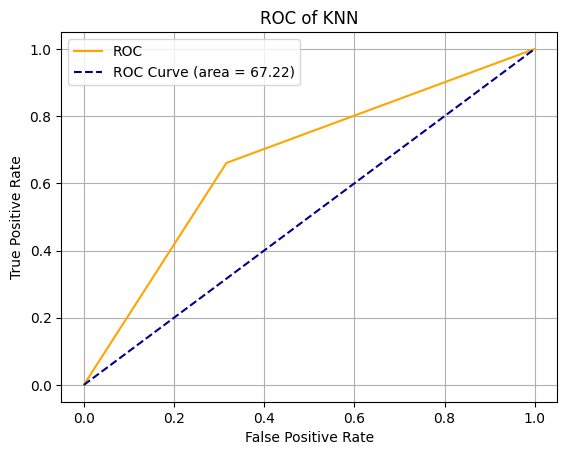

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC Curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of KNN')
plt.legend()
plt.grid()
plt.show

#XGBoost


In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),
    ('clf',XGBClassifier(random_state=8))
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='roc_auc', random_state=8)

In [ ]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=N...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [ ]:
opt.best_estimator_

Pipeline(steps=[('encoder', TargetEncoder(cols=[])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.9425384185492701,
                               colsample_bynode=0.9095956806239844,
                               colsample_bytree=0.706128679361455, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=1.6598135411398998,
                               g...None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.7929828265552742, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=8, ...))])

In [ ]:
opt.best_score_


0.8728338283828383

In [ ]:
opt.score(X_test, y_test)


0.7964650145772594

In [ ]:
y_p = opt.predict(X_test)


In [ ]:
opt.predict_proba(X_test)


array([[0.6998626 , 0.30013737],
       [0.29942822, 0.7005718 ],
       [0.14687693, 0.85312307],
       [0.8710888 , 0.1289112 ],
       [0.76449364, 0.23550637],
       [0.31515735, 0.68484265],
       [0.74437773, 0.25562224],
       [0.7620043 , 0.2379957 ],
       [0.9327134 , 0.06728663],
       [0.30055857, 0.69944143],
       [0.6956763 , 0.30432364],
       [0.40657097, 0.593429  ],
       [0.80302787, 0.1969721 ],
       [0.85279256, 0.14720742],
       [0.08798373, 0.9120163 ],
       [0.17329341, 0.8267066 ],
       [0.8710888 , 0.1289112 ],
       [0.2473076 , 0.7526924 ],
       [0.8005804 , 0.19941959],
       [0.6625887 , 0.3374113 ],
       [0.32848048, 0.6715195 ],
       [0.35380667, 0.6461933 ],
       [0.85279256, 0.14720742],
       [0.32848048, 0.6715195 ],
       [0.80530185, 0.19469814],
       [0.904437  , 0.09556301],
       [0.08798373, 0.9120163 ],
       [0.4340266 , 0.5659734 ],
       [0.83931816, 0.16068181],
       [0.85279256, 0.14720742],
       [0.

In [ ]:
print("XGBoost Classification_Report on Dataset1")
print(classification_report(y_test,y_p))

XGBoost Classification_Report on Dataset1
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        98
           1       0.65      0.71      0.68        56

    accuracy                           0.75       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [ ]:
from sklearn import metrics
Accuracy_xgg1 = metrics.accuracy_score(y_test,y_p)
print("Accuracy of XGBoost Model1: ",Accuracy_xgg1*100)

Accuracy of XGBoost Model1:  75.32467532467533


<function matplotlib.pyplot.show(close=None, block=None)>

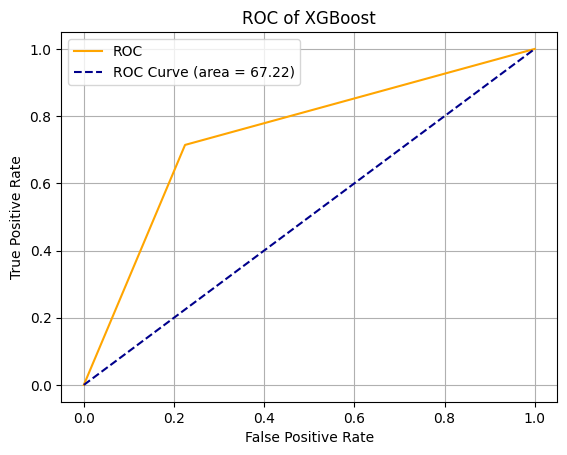

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_p)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC Curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of XGBoost')
plt.legend()
plt.grid()
plt.show

#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [ ]:
y_pp = svm_model.predict(X_test)

In [ ]:
y_predd = svm_model.predict(X_test)
print("SVM Classification_Report on Pima Dataset")
print(classification_report(y_test,y_pp))

SVM Classification_Report on Pima Dataset
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        98
           1       0.60      0.68      0.64        56

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.72      0.72       154



In [ ]:
from sklearn import metrics
Accuracy_svm1 = metrics.accuracy_score(y_test,y_pp)
print("Accuracy of SVM Model1: ",Accuracy_svm1*100)

Accuracy of SVM Model1:  72.07792207792207


<function matplotlib.pyplot.show(close=None, block=None)>

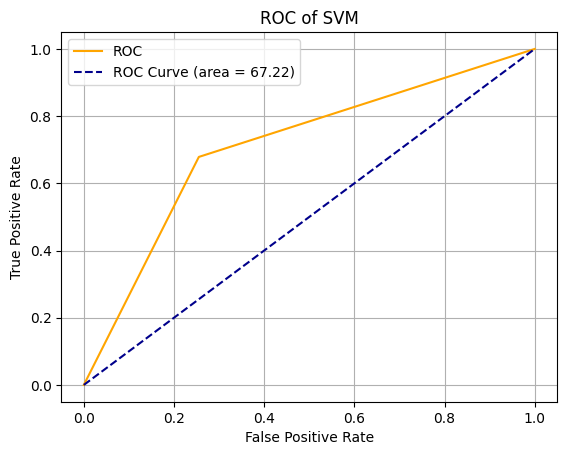

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predd)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC Curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of SVM')
plt.legend()
plt.grid()
plt.show

In [ ]:
Accuracy = {'KNN':70.12,'XGBoost':75.32,'SVM':75.32}
xlabels = list(Accuracy.keys())
ylabels = list(Accuracy.values())

Text(0.5, 1.0, 'Comparision between Models in Pima Dataset')

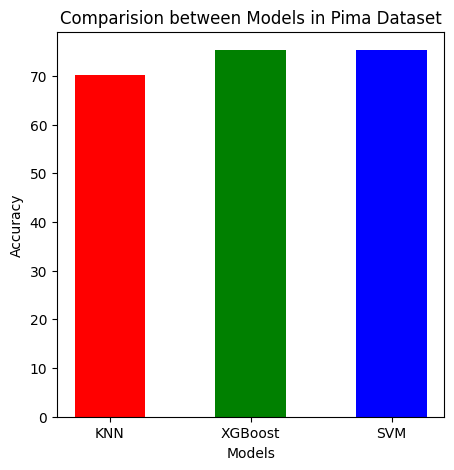

In [ ]:
plt.figure(figsize=(5,5))
color = ['red','green','blue']
plt.bar(xlabels,ylabels,color=color,width=0.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparision between Models in Pima Dataset')